# Prepare Data

In [1]:
# Prepare data
import pandas as pd

dataset = pd.read_csv('titanic.csv')

print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Find missing data
missing_data = dataset.isnull().sum().to_frame()
missing_data = missing_data.rename(columns={0: 'Missing Data'})
missing_data

,Missing Data
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

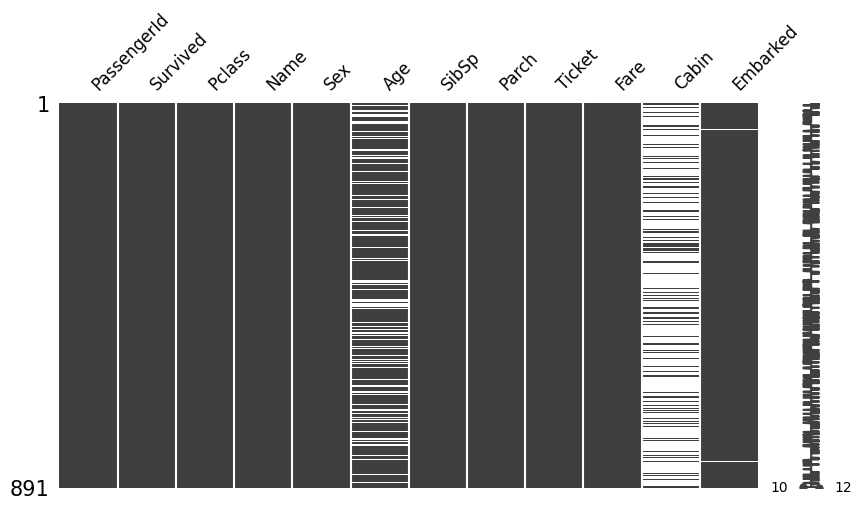

In [3]:
# Plot the missing data
import missingno as msno

msno.matrix(dataset, figsize=(10, 5), fontsize=12)

In [4]:
# Identify individual passengers with missing data

unknown_age = dataset[dataset['Age'].isnull()]

unknown_age[["PassengerId", "Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


In [5]:
missing_age = dataset['Age'].isnull()
missing_cabin = dataset['Cabin'].isnull()

unknown_age_cabin = dataset[missing_age & missing_cabin]
print(unknown_age_cabin.shape)
unknown_age_cabin.head()

(158, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


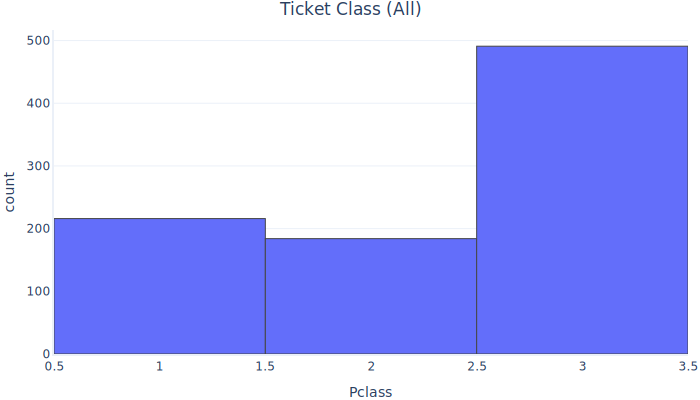

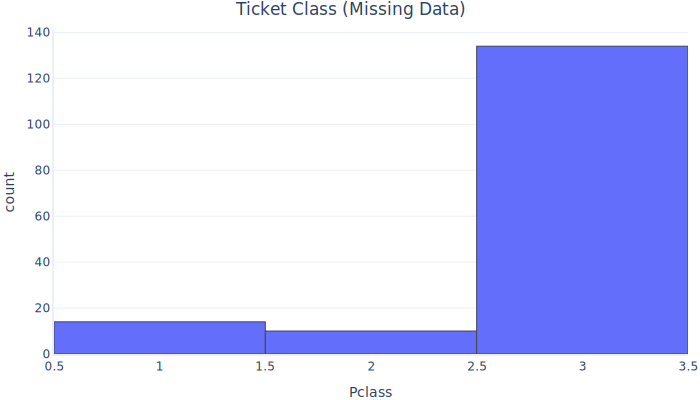

In [6]:
import graphing as gr
import plotly.io as pio

pio.renderers.default = "svg"


gr.histogram(dataset, "Pclass", title="Ticket Class (All)", show=True)
gr.histogram(unknown_age_cabin, 'Pclass', title="Ticket Class (Missing Data)")

In [7]:
# Detect missing as Zero
# This dataset does not have missing as a zero, let's create one
import numpy as np

mean_age = np.mean(dataset['Age'])
print(mean_age)

dataset['Age_2'] = dataset['Age'].fillna(0)
mean_age_2 = np.mean(dataset['Age_2'])
print(mean_age_2)

29.69911764705882
23.79929292929293


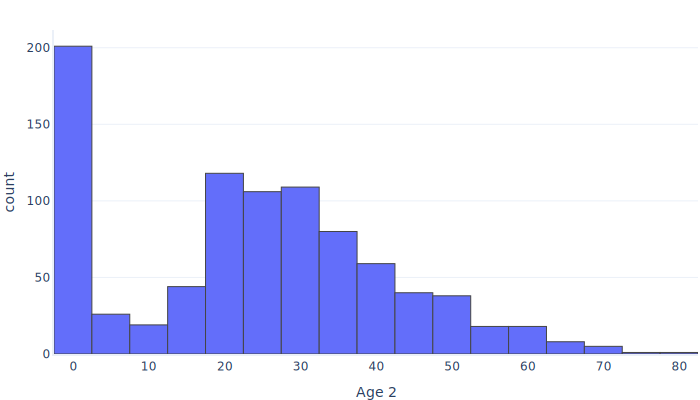

In [8]:
gr.histogram(dataset, "Age_2")

## Handling missing data

In [9]:
# Delete missing data
print("Original size: ", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"])
clean_dataset = clean_dataset.reindex()
print("Clean size: ", clean_dataset.shape)

Original size:  (891, 13)
Clean size:  (889, 13)


In [10]:
# Replace missing data with the mean or median

mean_age = np.mean(clean_dataset['Age'])
print(mean_age)

clean_dataset['Age'].fillna(mean_age, inplace=True)

print(clean_dataset.isnull().sum().to_frame().rename(columns={0: 'Missing Data'}))

29.64209269662921
             Missing Data
PassengerId             0
Survived                0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                0
Age_2                   0


In [11]:
# Assing a new category to unknown categorical data
clean_dataset['Cabin'].fillna('Unknown', inplace=True)

print(clean_dataset.isnull().sum().to_frame().rename(columns={0: 'Missing Data'}))

             Missing Data
PassengerId             0
Survived                0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                   0
Embarked                0
Age_2                   0


# Types of data

### Viz ordinal data

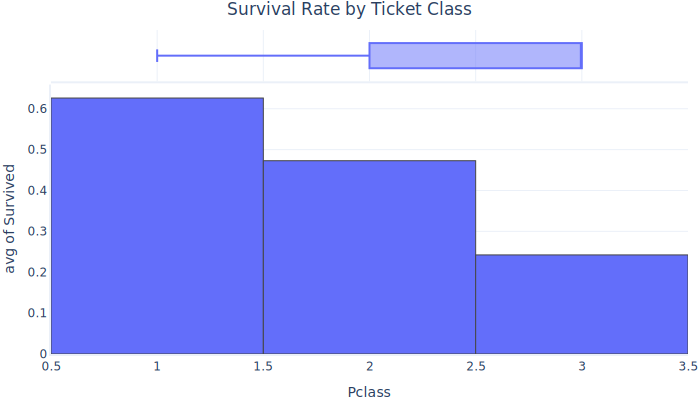

In [14]:
# Viz ordinal data
gr.histogram(clean_dataset, label_x="Pclass", label_y="Survived", histfunc="avg", title="Survival Rate by Ticket Class", include_boxplot=True)

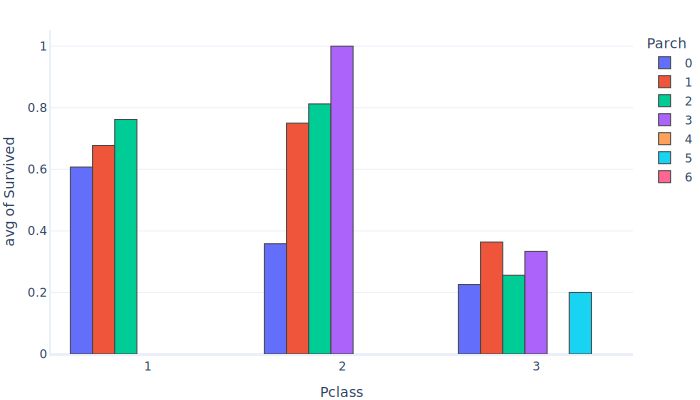

In [15]:
gr.multiple_histogram(dataset, 
                            label_x='Pclass', # group by ticket class
                            label_group="Parch", # colour by no parents or children
                            label_y='Survived', 
                            histfunc="avg")

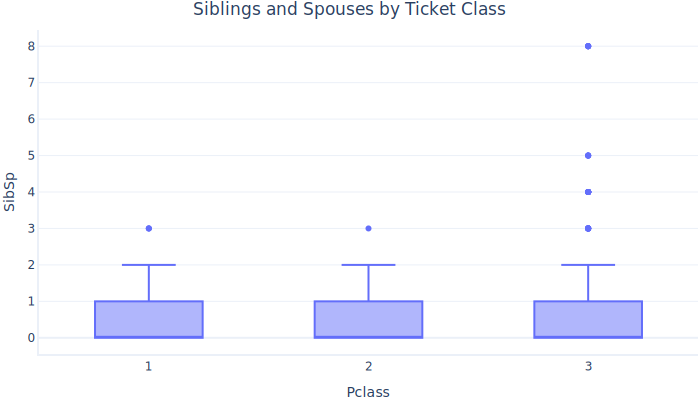

In [16]:
# let's see if those with different ticket types tended to be in different sized families

gr.box_and_whisker(dataset, label_x="Pclass", label_y="SibSp", title="Siblings and Spouses by Ticket Class")

Most values are zero. This shows that most people traveled without siblings and without a partner. There are no obvious differences in this value between the different ticket classes.

### Viz Continuous Data

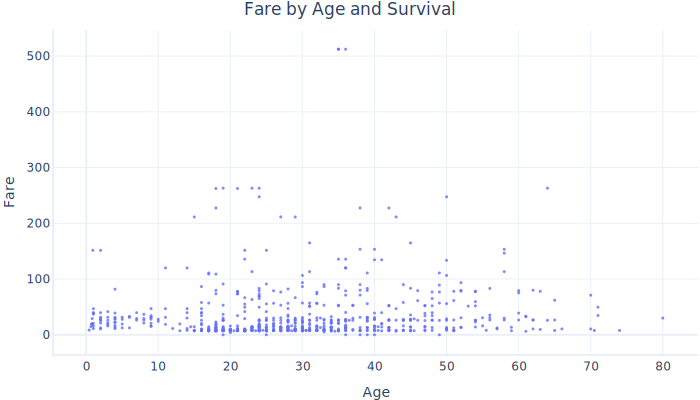

In [18]:
gr.scatter_2D(dataset, label_x="Age", label_y="Fare", title="Fare by Age and Survival")

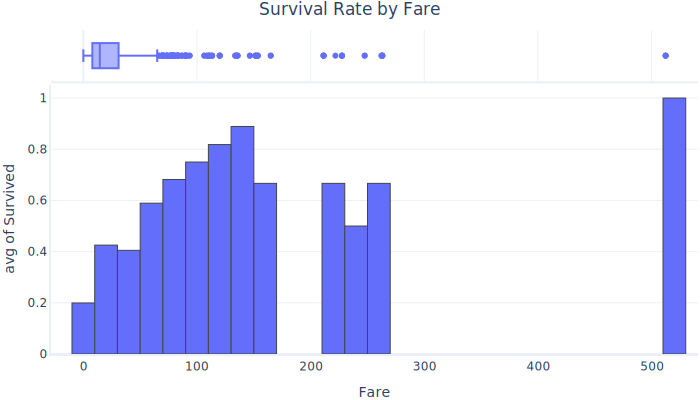

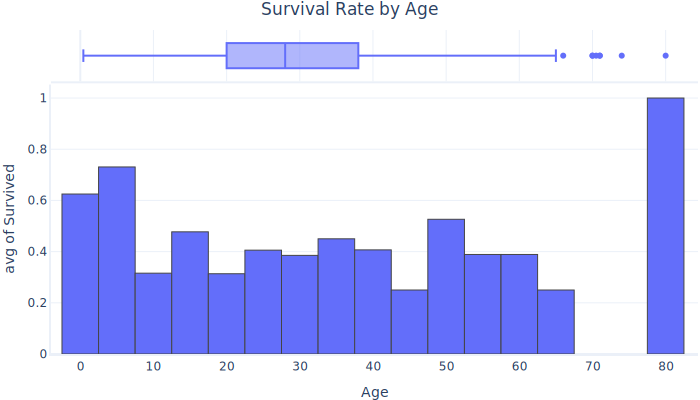

In [19]:
# Histogram fare vs survival
gr.histogram(dataset, label_x="Fare", label_y="Survived", histfunc="avg", nbins=30, title="Survival Rate by Fare", include_boxplot=True, show=True)

# Histogram age vs survival
gr.histogram(dataset, label_x="Age", label_y="Survived", histfunc="avg", nbins=30, title="Survival Rate by Age", include_boxplot=True)


### Viz categorical data

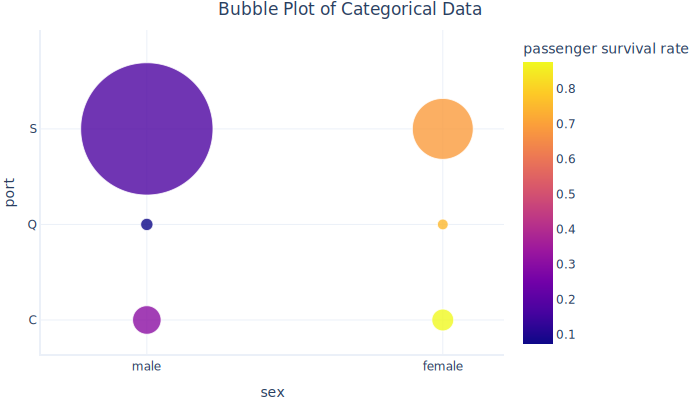

In [20]:
import plotly.graph_objects as go
import numpy as np

# Create some simple functions
# Read their descriptions to find out more 
def get_rows(sex, port):
    '''Returns rows that match in terms of sex and embarkment port'''
    return dataset[(dataset.Embarked == port) & (dataset.Sex == sex)]

def proportion_survived(sex, port):
    '''Returns the proportion of people meeting criteria who survived'''
    survived = get_rows(sex, port).Survived
    return np.mean(survived)

# Make two columns of data - together these represent each combination
# of sex and embarkment port
sexes = ["male", "male", "male", "female","female", "female"]
ports = ["C", "Q", "S" ] * 2

# Calculate the number of passengers at each port + sex combination
passenger_count = [len(get_rows(sex, port)) for sex,port in zip(sexes, ports)]

# Calculate the proportion of passengers from each port + sex combination who survived
passenger_survival = [proportion_survived(sex, port) for sex,port in zip(sexes, ports)]

# Combine into a single data frame
table = pd.DataFrame(dict(
    sex=sexes,
    port=ports,
    passenger_count=passenger_count,
    passenger_survival_rate=passenger_survival
))

table.head()

# Make a bubble plot
# This is just a scatter plot but each entry in the plot 
# has a size and colour. We set colour to passenger_survival 
# and size to the number of passengers 
gr.scatter_2D(table, 
                    label_colour="passenger_survival_rate", 
                    label_size="passenger_count", 
                    size_multiplier=0.3,
                    title="Bubble Plot of Categorical Data")

# Vectores One Hot
## Logistic Regression Model


### Numerical only

In [22]:
from train_logreg import train_logistic_regression

features = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
loss_numerical = train_logistic_regression(clean_dataset, features)
print(loss_numerical)

0.5816626689051092


### Binary Categorical

In [23]:
# Convert Sex Values to IsFemale, 0 or 1
clean_dataset["IsFemale"] = clean_dataset.Sex.replace({'male':0, 'female':1})
print(clean_dataset.head())

# Train a model with the new feature
features = ["Age", "Fare", "Pclass", "SibSp", "Parch", "IsFemale"]
loss_categorical = train_logistic_regression(clean_dataset, features)
print(loss_categorical)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  Age_2  IsFemale  
0      0         A/5 21171   7.2500  Unknown        S   22.0         0  
1      0          PC 17599  71.2833      C85        C   38.0         1  
2      0  STON/O2. 3101282   7.9250  Unknown        S   26.0         1  
3      0            113803  

### One hot encoding

In [25]:
# Lets conver Pclass into a categorical variable using one-hot encoding

# Geta all posible categories
print(clean_dataset.Pclass.unique())

dataset_with_onehot = pd.get_dummies(clean_dataset, columns=["Pclass"])
dataset_with_onehot["Pclass"] = dataset.Pclass

dataset_with_onehot.head()

[3 1 2]


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_2,IsFemale,Pclass_1,Pclass_2,Pclass_3,Pclass
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,22.0,0,0,0,1,3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1,1,0,0,1
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,26.0,1,0,0,1,3
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1,1,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,35.0,0,0,0,1,3


In [26]:
# train the model with the new feature
features = ["Age", "SibSp", "Parch", "Fare", "IsFemale", "Pclass_1", "Pclass_2", "Pclass_3"]

loss_onehot = train_logistic_regression(dataset_with_onehot, features)
print(loss_onehot)

0.43401591597013045


#### Include Cabin

In [27]:
# Use Pandas to One-Hot encode the Cabin and Pclass categories
dataset_with_onehot = pd.get_dummies(clean_dataset, columns=["Pclass", "Cabin"], drop_first=False)

# Find cabin column names
cabin_column_names = list(c for c in dataset_with_onehot.columns if c.startswith("Cabin_"))

# Print out how many cabins there were
print(len(cabin_column_names), "cabins found")

# Make a list of features
features = ["Age", "SibSp", "Parch", "Fare", "IsFemale",
            "Pclass_1", "Pclass_2", "Pclass_3"] + \
            cabin_column_names

# Run the model and print the result
loss_cabin_categorical = train_logistic_regression(dataset_with_onehot, features)

print(f"\nNumerical, Sex, Categorical Pclass, Cabin, Log-Loss (cost): {loss_cabin_categorical}")

147 cabins found

Numerical, Sex, Categorical Pclass, Cabin, Log-Loss (cost): 0.4292338319090378


Including very large numbers of categorical classes - for example, 135 cabins - is often not the best way to train a model, because the model only has a few examples of each category class to learn from.

Sometimes, we can improve models if we simplify features. `Cabin` was probably useful because it indicated which Titanic deck people were probably situated in: those in lower decks would have had their quarters flooded first. 

It might become simpler to use deck information, instead of categorizing people into Cabins. 

Let's simplify what we have run, replacing the 135 `Cabin` categories with a simpler `Deck` category that has only 9 values: A - G, T, and U (Unknown)

In [28]:
# We have cabin names, like A31, G45. The letter refers to the deck that
# the cabin was on. Extract just the deck and save it to a column. 
clean_dataset["Deck"] = [c[0] for c in clean_dataset.Cabin]

print("Decks: ", sorted(clean_dataset.Deck.unique()))

# Create one-hot vectors for:
# Pclass - the class of ticket. (This could be treated as ordinal or categorical)
# Deck - the deck that the cabin was on
dataset_with_onehot = pd.get_dummies(clean_dataset, columns=["Pclass", "Deck"], drop_first=False)

# Find the deck names
deck_of_cabin_column_names = list(c for c in dataset_with_onehot.columns if c.startswith("Deck_"))
 
features = ["Age", "IsFemale", "SibSp", "Parch", "Fare", 
            "Pclass_1", "Pclass_2", "Pclass_3",
            "Deck_A", "Deck_B", "Deck_C", "Deck_D", 
            "Deck_E", "Deck_F", "Deck_G", "Deck_U", "Deck_T"]

loss_deck = train_logistic_regression(dataset_with_onehot, features)

print(f"\nSimplifying Cabin Into Deck, Log-Loss (cost): {loss_deck}")

Decks:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']

Simplifying Cabin Into Deck, Log-Loss (cost): 0.42443488787645234


In [29]:
# Use a dataframe to create a comparison table of metrics
# Copy metrics from previous Unit

l =[["Numeric Features Only", loss_numerical],
    ["Adding Sex as Binary", loss_categorical],
    ["Treating Pclass as Categorical", loss_onehot],
    ["Using Cabin as Categorical", loss_cabin_categorical],
    ["Using Deck rather than Cabin", loss_deck]]

pd.DataFrame(l, columns=["Dataset", "Log-Loss (Low is better)"])

,Dataset,Log-Loss (Low is better)
0,Numeric Features Only,0.581663
1,Adding Sex as Binary,0.433990
2,Treating Pclass as Categorical,0.434016
3,Using Cabin as Categorical,0.429234
4,Using Deck rather than Cabin,0.424435
